<a href="https://colab.research.google.com/github/josware/mcc_tareas/blob/master/Regresi%C3%B3n_Multi_Variable_OLS_Ordinary_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [ ]:
mypath = "/content/drive/My Drive/MCC-2020/Tecnicas-ML/housingdata_w_columnNames.csv" 

# Imports

In [ ]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import statsmodels.api as sm      # biblioteca para pruebas estadísticas.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Objetivo predecir MEDV

1. En este ejercicio usaremos la base de datos de Boston_housing_dataset
(https://www.kaggle.com/apratim87/housingdata) la cual consta de 13 variables
independientes y la variable dependiente. Son 506 datos de casas cuyo
objetivo es la predicción de su costo (MEDV). 

In [ ]:
mydata = pd.read_csv(mypath)
mydata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
mydata.shape

(506, 14)

In [ ]:
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]])

In [ ]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Defining x & y for first model

In [ ]:
x = dataset[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
y = dataset[["MEDV"]]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
xones = sm.add_constant(x)  # agregando la columna de 1s
print(xones)

     const     CRIM    ZN  INDUS  CHAS  ...  RAD  TAX  PTRATIO       B  LSTAT
0      1.0  0.00632  18.0   2.31     0  ...    1  296     15.3  396.90   4.98
1      1.0  0.02731   0.0   7.07     0  ...    2  242     17.8  396.90   9.14
2      1.0  0.02729   0.0   7.07     0  ...    2  242     17.8  392.83   4.03
3      1.0  0.03237   0.0   2.18     0  ...    3  222     18.7  394.63   2.94
4      1.0  0.06905   0.0   2.18     0  ...    3  222     18.7  396.90   5.33
..     ...      ...   ...    ...   ...  ...  ...  ...      ...     ...    ...
501    1.0  0.06263   0.0  11.93     0  ...    1  273     21.0  391.99   9.67
502    1.0  0.04527   0.0  11.93     0  ...    1  273     21.0  396.90   9.08
503    1.0  0.06076   0.0  11.93     0  ...    1  273     21.0  396.90   5.64
504    1.0  0.10959   0.0  11.93     0  ...    1  273     21.0  393.45   6.48
505    1.0  0.04741   0.0  11.93     0  ...    1  273     21.0  396.90   7.88

[506 rows x 14 columns]


a. Obtener el modelo de Regresión Lineal Múltiple (RLM) del modelo y
con base a dicho modelo contestar los siguientes incisos:

i. Interpretar el valor del coeficiente de determinación ajustado de R^2

## i Primer modelo - Multiple Lineal Regression (MLR)

In [ ]:
mimodelo = sm.OLS(y, xones).fit()

In [ ]:
print(mimodelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        15:51:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

ii. Determina qué variables no resultaron significativas
considerendo un 𝑣𝑎𝑙𝑜𝑟-𝑝 = 0.01. 

## ii - Quitando variables con p-value mayor a 0.01
### Removiendo variables:
* INDUS
* AGE
* quedando: 

x_pvalue = dataset_pvalue[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]

y_pvalue = dataset_pvalue[["MEDV"]]


Determina qué variables no resultaron significativas
considerendo un 𝑣𝑎𝑙𝑜𝑟-𝑝 = 0.01. 

In [ ]:
dataset_pvalue = pd.DataFrame(mydata[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]])
x_pvalue = dataset_pvalue [["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
xones_pvalue = sm.add_constant(x_pvalue)
y_pvalue = dataset_pvalue[["MEDV"]]
mymodel_pvalue = sm.OLS(y_pvalue, xones_pvalue).fit()

Los valores P de ambas variables eran muy por sobre el limite, el modelo tiene valores de R y R ajustada aproximados a 1

## iii Segundo modelo (sin las variables con valor p alto)

Obtener un segundo modelo de RLM omitiendo las variables
que no resultaron significativas en el inciso anterior. Comparar
su coeficiente de determinación ajustado con base con
respecto al primer modelo. 

OLS = Ordinary Least Squares

In [ ]:
print(mymodel_pvalue.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        15:51:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

In [ ]:
print(mymodel_pvalue.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.735    
Dependent Variable: MEDV             AIC:                3021.7264
Date:               2020-08-31 15:51 BIC:                3072.4448
No. Observations:   506              Log-Likelihood:     -1498.9  
Df Model:           11               F-statistic:        128.2    
Df Residuals:       494              Prob (F-statistic): 5.54e-137
R-squared:          0.741            Scale:              22.432   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       36.3411    5.0675    7.1714  0.0000   26.3846   46.2976
CRIM        -0.1084    0.0328   -3.3074  0.0010   -0.1728   -0.0440
ZN           0.0458    0.0135    3.3902  0.0008    0.0193    0.0724
CHAS         2.7187    0.8542    3.1826  0.0016    1.0403    4.3971
NOX   

### Camparando R2 y la R2 ajustada de los primeros 2 modelos:

*   Valor de R2 y R2 ajustada del modelo con todas las variables: 
    * 0.741 
    * 0.734
*   Valor de R2 y R2 ajustada del modelo con todas las variables: 
    * 0.741 
    * 0.735

Hay una pequeña mejora en e la R2 ajustada, sin embargo no parece significativa. Aunque menos variables facilita el manejo del modelo, se sugiere tomar en cuenta, ahora con estas 11 variables una anlísis de correlación



## iv - Obteniendo la matríz de coorelación de 14 variables

Obtener la matriz de correlación de Pearson de las 14
variables. Con base a dicha matriz identifica los pares de
variables independientes que tengan un coeficiente de
correlación mayor o igual a 0.7 en valor absoluto. Obtener un
tercer modelo de RLM y compara la significacia de los
coeficientes y su coeficiente de determinación ajustado con
respecto a los dos primeros modelos. 

In [ ]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
corr_mtx = dataset.corr(method='pearson').abs()
corr_pairs = corr_mtx.unstack()
corr_pairs_sorted = corr_pairs.sort_values(kind='quicksort')
print(corr_pairs_sorted)

CHAS   RAD      0.007368
RAD    CHAS     0.007368
CHAS   TAX      0.035587
TAX    CHAS     0.035587
ZN     CHAS     0.042697
                  ...   
CHAS   CHAS     1.000000
INDUS  INDUS    1.000000
ZN     ZN       1.000000
LSTAT  LSTAT    1.000000
MEDV   MEDV     1.000000
Length: 196, dtype: float64


### Removiendo relaciones debajo de 0.7 e iguales a "1"

In [ ]:
corr_pairs_strong = corr_pairs_sorted[(corr_pairs_sorted >= 0.7) & (corr_pairs_sorted < 1)]
print(corr_pairs_strong)

INDUS  DIS      0.708027
DIS    INDUS    0.708027
INDUS  TAX      0.720760
TAX    INDUS    0.720760
NOX    AGE      0.731470
AGE    NOX      0.731470
MEDV   LSTAT    0.737663
LSTAT  MEDV     0.737663
DIS    AGE      0.747881
AGE    DIS      0.747881
NOX    INDUS    0.763651
INDUS  NOX      0.763651
DIS    NOX      0.769230
NOX    DIS      0.769230
TAX    RAD      0.910228
RAD    TAX      0.910228
dtype: float64


### INDUS DIS relation

In [ ]:
print("Correlation INDUS & DIS ", corr_pairs_strong["INDUS","DIS"])
print("Correlation INDUS & MEDV ", corr_pairs_sorted ["INDUS","MEDV"])
print("Correlation DIS & MEDV ", corr_pairs_sorted ["DIS","MEDV"])

Correlation INDUS & DIS  0.7080269887427683
Correlation INDUS & MEDV  0.483725160028373
Correlation DIS & MEDV  0.24992873408590394


#### Keeping INDUS (Corr 0.483725160028373)

### INDUS TAX relation

In [ ]:
print("Correlation INDUS & TAX ", corr_pairs_strong["INDUS","TAX"])
print("Correlation INDUS & MEDV ", corr_pairs_sorted ["INDUS","MEDV"])
print("Correlation TAX & MEDV ", corr_pairs_sorted ["TAX","MEDV"])

Correlation INDUS & TAX  0.7207601799515441
Correlation INDUS & MEDV  0.483725160028373
Correlation TAX & MEDV  0.46853593356776646


#### Keeping INDUS (Corr 0.483725160028373)

### NOX AGE relation

In [ ]:
print("Correlation NOX & AGE ", corr_pairs_strong["NOX","AGE"])
print("Correlation NOX & MEDV ", corr_pairs_sorted ["NOX","MEDV"])
print("Correlation AGE & MEDV ", corr_pairs_sorted ["AGE","MEDV"])

Correlation NOX & AGE  0.7314701037859578
Correlation NOX & MEDV  0.42732077237328164
Correlation AGE & MEDV  0.3769545650045959


#### Keeping NOX (Corr 0.42732077237328164)

### MEDV LSTAT relation

In [ ]:
print("Correlation MEDV & LSTAT ", corr_pairs_strong["MEDV","LSTAT"])
print("Correlation LSTAT & MEDV ", corr_pairs_sorted ["LSTAT","MEDV"])
print("Correlation LSTAT & MEDV ", corr_pairs ["LSTAT","MEDV"])

Correlation MEDV & LSTAT  0.7376627261740143
Correlation LSTAT & MEDV  0.7376627261740143
Correlation LSTAT & MEDV  0.7376627261740143


#### Keeping LSTAT as it shows a strong coorrelation with the dependant var (0.7376627261740143)

### DIS AGE relation

In [ ]:
print("Correlation DIS & AGE ", corr_pairs_strong["DIS","AGE"])
print("Correlation DIS & MEDV ", corr_pairs_sorted ["DIS","MEDV"])
print("Correlation AGE & MEDV ", corr_pairs_sorted ["AGE","MEDV"])

Correlation DIS & AGE  0.7478805408686316
Correlation DIS & MEDV  0.24992873408590394
Correlation AGE & MEDV  0.3769545650045959


#### Keeping AGE (Corr 0.3769545650045959), however gien age's poor pvalue probably better analyze keeping DIS

### NOX INDUS relation

In [ ]:
print("Correlation NOX & INDUS ", corr_pairs_strong["NOX","INDUS"])
print("Correlation NOX & MEDV ", corr_pairs_sorted ["NOX","MEDV"])
print("Correlation INDUS & MEDV ", corr_pairs_sorted ["INDUS","MEDV"])

Correlation NOX & INDUS  0.7636514469209145
Correlation NOX & MEDV  0.42732077237328164
Correlation INDUS & MEDV  0.483725160028373


#### Keeping INDUS (Corr 0.483725160028373)

### DIS NOX relation

In [ ]:
print("Correlation DIS & NOX ", corr_pairs_strong["DIS","NOX"])
print("Correlation DIS & MEDV ", corr_pairs_sorted ["DIS","MEDV"])
print("Correlation NOX & MEDV ", corr_pairs_sorted ["NOX","MEDV"])

Correlation DIS & NOX  0.7692301132258261
Correlation DIS & MEDV  0.24992873408590394
Correlation NOX & MEDV  0.42732077237328164


#### Keeping NOX (Corr 0.42732077237328164)

> Indented block



### TAX RAD relation

In [ ]:
print("Correlation TAX & RAD ", corr_pairs_strong["TAX","RAD"])
print("Correlation TAX & MEDV ", corr_pairs_sorted ["TAX","MEDV"])
print("Correlation RAD & MEDV ", corr_pairs_sorted ["RAD","MEDV"])

Correlation TAX & RAD  0.9102281885331822
Correlation TAX & MEDV  0.46853593356776646
Correlation RAD & MEDV  0.3816262306397776


#### Keeping TAX (Corr 0.46853593356776646)

### Tercer modelo

In [ ]:
dataset_corr_sig = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]])
x_corr_sig= dataset_corr_sig [["INDUS","NOX","LSTAT","AGE","TAX"]]
xones_corr_sig = sm.add_constant(x_corr_sig)
y_corr_sig = dataset_corr_sig[["MEDV"]]
mymodel_pvalue = sm.OLS(y_corr_sig, xones_corr_sig).fit()
print(mymodel_pvalue.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           5.57e-88
Time:                        15:51:06   Log-Likelihood:                -1629.7
No. Observations:                 506   AIC:                             3271.
Df Residuals:                     500   BIC:                             3297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2992      1.603     20.778      0.0

### Camparando R2 y la R2 ajustada de los primeros 3 modelos:

*   R2 and adjusted R2 from first model: 
    * 0.741 
    * 0.734
*   R2 and adjusted R2 from second model: 
    * 0.741 
    * 0.735
*   R2 and adjusted R2 from third model: 
    * 0.565 
    * 0.561


Podemos observar que el tercer modelo se degrada, esto es por que aunque la correalción es alta, debemos tomar en cuenta y eliminar primero las variables con un valor p alto, antes de proceder a estas acciones.



## V - Modelo con una correlación mayor a 0.5

Con base a la matriz de correlación con las 14 variables,
identifica ahora aquellas variables independientes que tengan
una correlación de pearson mayor o igual a 0.5 con respecto a
la variable dependiente MEDV. Obtener un cuarto modelo
RLM y compararlo con los tres anteriores. 

### obteniendo todas las correlaciones con MEDV 

In [ ]:
corr_pairs_medv = corr_pairs_sorted["MEDV"]
print(corr_pairs_medv)

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
MEDV       1.000000
dtype: float64


### Obeteniendo solo las variables mayores a 0.5 y diferentes de 1

In [ ]:
corr_pairs_medv[(corr_pairs_medv >= 0.5) & (corr_pairs_medv < 1)]

PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
dtype: float64

### Cuarto modelo

In [ ]:
dataset_corr_cto = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]])
x_corr_cto = dataset_corr_cto [["RM","PTRATIO","LSTAT"]]
xones_corr_cto = sm.add_constant(x_corr_cto)
y_corr_cto = dataset_corr_cto[["MEDV"]]
mymodel_cto = sm.OLS(y_corr_cto, xones_corr_cto).fit()
print(mymodel_cto.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.69e-123
Time:                        15:51:06   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

### Camparando R2 y la R2 ajustada de los primeros 4 modelos:

*   R2 y R2 ajustada del primer modelo: 
    * 0.741 
    * 0.734
*   R2 y R2 ajustada del segundo modelo: 
    * 0.741 
    * 0.735
*   R2 y R2 ajustada del tercer modelo: 
    * 0.565 
    * 0.561
*   R2 y R2 ajustada del cuarto modelo: 
    * 0.679 
    * 0.677

Este cuarto modelo mejora con respecto al tercero, ya que solo usamos las variables con alta correlación con respecto a la variable dependiente, sin embargo al ser pocas variables, sigue el segundo siendo el mejor

## Vi - Modelo con 3 variables (Penrose)

Usando únicamente la matriz 𝑋 con las 3 variables
independientes del inciso anterior y la variable de salida
MDEV, obtener la matriz de Pearson matrix de Pearson.png

Posteriormente obtener los coeficientes 𝛽 del modelo RLM
resultante mediante la expresión: 𝛽 = 𝑋ା𝑌. Compáralo con el
inciso anterior y escribe tus conclusiones. 

In [ ]:
dataset_corr_penrose = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]])
x_corr_penrose = dataset_corr_penrose [["RM","PTRATIO","LSTAT"]]
xones_corr_penrose = sm.add_constant(x_corr_penrose)
y_corr_penrose = dataset_corr_penrose[["MEDV"]]
#mymodel_penrose = sm.OLS(y_corr_penrose, xones_corr_penrose).fit()
#print(mymodel_penrose.summary())

In [ ]:
penrose_mtx = np.linalg.pinv(xones_corr_penrose)
penrose_mtx

array([[ 0.03952983,  0.01043917, -0.01706077, ..., -0.04472625,
        -0.03726603, -0.00082618],
       [-0.00186772, -0.00058374,  0.00261906, ...,  0.00282858,
         0.00192797, -0.00262827],
       [-0.00121137, -0.00015405,  0.00028275, ...,  0.00177491,
         0.00168533,  0.00139088],
       [-0.00027339, -0.0001542 , -0.00020874, ..., -0.00030277,
        -0.00031439, -0.0005018 ]])

In [ ]:
penrose_coef = np.linalg.pinv(xones_corr_penrose).dot(y_corr_penrose)
penrose_coef[0]

array([18.56711151])

In [ ]:
#Los coeficientes se imprimen en el mismo orden en el que están en el DataSet
penrose_coef_labels = ["const", "RM","PTRATIO","LSTAT"]
for i in range(len(penrose_coef)):
  print(penrose_coef_labels[i], ": ", penrose_coef[i][0])


const :  18.56711150539507
RM :  4.515420943855422
PTRATIO :  -0.9307225552706163
LSTAT :  -0.5718056878724758


### Compáralo con el inciso anterior y escribe tus conclusiones. 

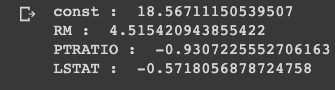

vs

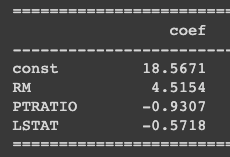

Parecen ser exactamente las mismas, por lo que se entiende y comprueba que parte del reporte en la generación de cada modelo es la generación de esta.

## viii - Modelos generado a partir de lo aprendido

### Quitando variables con p-value mayor a 0.01
#### Removiendo variables:
* INDUS
* AGE
* quedando: 

In [ ]:
dataset_final = pd.DataFrame(mydata[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]])
x_final = dataset_final[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
xones_final = sm.add_constant(x_final)
y_final = dataset_final[["MEDV"]]
mymodel_final = sm.OLS(y_final, xones_final).fit()
print(mymodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        15:51:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

In [ ]:
dataset_final.corr(method='pearson')

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,-0.055892,0.420972,-0.219247,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.042697,-0.516604,0.311991,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
CHAS,-0.055892,-0.042697,1.000000,0.091203,0.091251,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.091203,1.000000,-0.302188,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,0.091251,-0.302188,1.000000,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
DIS,-0.379670,0.664408,-0.099176,-0.769230,0.205246,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,-0.007368,0.611441,-0.209847,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,-0.035587,0.668023,-0.292048,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,-0.121515,0.188933,-0.355501,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,0.048788,-0.380051,0.128069,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461


In [ ]:
corr_mtx_final = dataset_final.corr(method='pearson').abs()
corr_pairs_final = corr_mtx_final.unstack()
corr_pairs_final_medv = corr_pairs_final["MEDV"]

In [ ]:
#Corr >= 0.1
dataset_vars_final = corr_pairs_final_medv[(corr_pairs_medv >= 0.1)]
dataset_x_final = corr_pairs_final_medv[(corr_pairs_medv >= 0.1) & (corr_pairs_medv != 1)]
print(dataset_vars_final.keys())
print(dataset_x_final.keys())


labels_final = np.array(dataset_vars_final.keys())
x_labels_final = np.array(dataset_x_final.keys())


Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')
Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


In [ ]:
dataset_final = pd.DataFrame(mydata[labels_final])
x_final = dataset_final[x_labels_final]
xones_final = sm.add_constant(x_final)
y_final = dataset_final[["MEDV"]]
mymodel_final = sm.OLS(y_final, xones_final).fit()
print(mymodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        15:51:07   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

## Función especifica a este problema:

In [ ]:
def gen_OLS_model(corr = 0.1):
  dataset_final = pd.DataFrame(mydata[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]])
  corr_mtx_final = dataset_final.corr(method='pearson').abs()
  corr_pairs_final = corr_mtx_final.unstack()
  corr_pairs_final_medv = corr_pairs_final["MEDV"]
  dataset_vars_final = corr_pairs_final_medv[(corr_pairs_medv >= corr )]
  dataset_x_final = corr_pairs_final_medv[(corr_pairs_medv >= corr ) & (corr_pairs_medv != 1)]
  print("Variables a ser consideradas por el ds:\n\n", dataset_vars_final.keys())
  print("\nVariables a ser consideradas como x:\n",dataset_x_final.keys())
  
  labels_final = np.array(dataset_vars_final.keys())
  x_labels_final = np.array(dataset_x_final.keys())
  dataset_final = pd.DataFrame(mydata[labels_final])
  x_final = dataset_final[x_labels_final]
  xones_final = sm.add_constant(x_final)
  y_final = dataset_final[["MEDV"]]
  mymodel_final = sm.OLS(y_final, xones_final).fit()
  print(mymodel_final.summary())



## Modelo corr > 0.0 (R2 0.741 & R2 ajustada 0.735)

In [ ]:
gen_OLS_model(corr = 0.0)

Variables a ser consideradas por el ds:

 Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

Variables a ser consideradas como x:
 Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        15:51:07   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11      

## Modelo corr > 0.1 (R2 0.741 & R2 ajustada 0.735)

In [ ]:
gen_OLS_model(corr = 0.1)

Variables a ser consideradas por el ds:

 Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

Variables a ser consideradas como x:
 Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        15:51:07   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11      

## Modelo corr > 0.2 (R2 0.735 & R2 ajustada 0.730)

In [ ]:
gen_OLS_model(corr = 0.2)

Variables a ser consideradas por el ds:

 Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'MEDV'],
      dtype='object')

Variables a ser consideradas como x:
 Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.70e-136
Time:                        15:51:07   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                      

## Modelo corr > 0.3 (R2 0.700 & R2 ajustada 0.694)

In [ ]:
gen_OLS_model(corr = 0.3)

Variables a ser consideradas por el ds:

 Index(['CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'MEDV'],
      dtype='object')

Variables a ser consideradas como x:
 Index(['CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.67e-123
Time:                        15:51:07   Log-Likelihood:                -1535.9
No. Observations:                 506   AIC:                             3092.
Df Residuals:                     496   BIC:                             3134.
Df Model:                           9                                         
Covaria

## Modelo corr > 0.4 (R2 0.680 & R2 ajustada 0.677)

In [ ]:
gen_OLS_model(corr = 0.4)

Variables a ser consideradas por el ds:

 Index(['NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index(['NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     212.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          4.06e-121
Time:                        15:51:07   Log-Likelihood:                -1552.2
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     500   BIC:                             3142.
Df Model:                           5                                         
Covariance Type:            nonrobust                                   

## Modelo corr > 0.5 (R2 0.679 & R2 ajustada 0.677)

In [ ]:
gen_OLS_model(corr = 0.5)

Variables a ser consideradas por el ds:

 Index(['RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.69e-123
Time:                        15:51:07   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef

## Modelo corr > 0.6 (R2 0.639 & R2 ajustada 0.637)

In [ ]:
gen_OLS_model(corr = 0.6)

Variables a ser consideradas por el ds:

 Index(['RM', 'LSTAT', 'MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index(['RM', 'LSTAT'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          7.01e-112
Time:                        15:51:07   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t

## Modelo corr > 0.7 (R2 0.544 & R2 ajustada 0.543)

In [ ]:
gen_OLS_model(corr = 0.7)

Variables a ser consideradas por el ds:

 Index(['LSTAT', 'MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index(['LSTAT'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        15:51:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

## Modelo corr > 0.8 (R2 0.000 & R2 ajustada 0.000)

In [ ]:
gen_OLS_model(corr = 0.8)

Variables a ser consideradas por el ds:

 Index(['MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index([], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 31 Aug 2020   Prob (F-statistic):                nan
Time:                        15:51:07   Log-Likelihood:                -1840.2
No. Observations:                 506   AIC:                             3682.
Df Residuals:                     505   BIC:                             3687.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


## Modelo corr > 0.9 (R2 0.000 & R2 ajustada 0.000)

In [ ]:
gen_OLS_model(corr = 0.9)

Variables a ser consideradas por el ds:

 Index(['MEDV'], dtype='object')

Variables a ser consideradas como x:
 Index([], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 31 Aug 2020   Prob (F-statistic):                nan
Time:                        15:51:07   Log-Likelihood:                -1840.2
No. Observations:                 506   AIC:                             3682.
Df Residuals:                     505   BIC:                             3687.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


## Vii - Conclusiones

Gracias a este analísis quedan claros varios puntos y conclusiones:

1.   El punto uno y dos nos muestran claramente el poder del valor P para identificar variables significativas que describen o no el modelo
2.   Los puntos 3, 4 y 5 son escenciales para ver como una correlación alta no necesariamente implica una apropiada descripción del modelo, siendo más eficaces los que antes limpian las variables con baja significancia
3.   El punto 6 demuestra que la pseudo inversa de Penrose es parte del reporte de la OLS (Ordinary Least Squares)

Finalmente elaboré una función para de manera rápida generar diez modelos confirmando la teoría de que entre más variables más rico es el modelo, siempre y cuando tengan un valor p bajo.

